# <u>Self Practice 5 and 6(Unsupervised Learning)</u>
Supervised Learning(Basic and Advanced) & Unsupervised Learning
***
Date: 11th November 2019<br>
Author: Samuel Natamihardja<br>
Company: Home Credit Indonesia

#### Importing Library

In [1]:
import pandas as pd #data wrangling
import numpy as np #calculation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

#Algorithm Unsupervised Learning
from sklearn.cluster import KMeans #Kmeans Clustering
import scipy.cluster.hierarchy as sch #Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering # AgglomerativeClustering
from sklearn.cluster import DBSCAN #DBSCAN

# #Model Evaluation
# from sklearn import metrics
# from sklearn.metrics import auc, roc_curve
# from sklearn.metrics import accuracy_score

#### Importing Dataset

In [2]:
df_train_raw = pd.read_csv('dataset/train.csv')
df_test_raw = pd.read_csv('dataset/test.csv')

In [3]:
row1 , column1 = df_train_raw.shape
row2 , column2 = df_test_raw.shape
print('Train dataset contains', row1, 'rows and', column1, 'columns.')
print('Test dataset contains', row2, 'rows and', column2, 'columns.')

Train dataset contains 8000 rows and 21 columns.
Test dataset contains 2000 rows and 20 columns.


In [4]:
# Preparing X_train, X_test, y_train, y_test
X_train = df_train_raw.drop(columns='att10', axis=1)
X_test = df_test_raw.copy()
y_train = df_train_raw[['att10']]
# y_test = df_test_raw[['att10']]

### Unsupervised Learning

1. Select att1 and att2 from train.csv and test.csv data. This step will result a new data
frame or a table with size of 10,000 rows and 2 columns. Perform clustering using at
least 3 algorithms (K-Means Clustering, Hierarchical Clustering, and DBSCAN) to
cluster that new data frame.
Submit your .ipynb file that contain the process of your clustering!
2. Assume that the dataset you are working is the employee data, whether
att1 is satisfaction level (the higher the satisfaction level, the more satisfy a person
does in his employment)
att2 is evaluation result (the higher the evaluation result, the better/harder a person
works in the company).
Can you name the clusters that you have just made?
***

In [5]:
# Prepare dataset that going to be used for clustering
X_train_2 = df_train_raw[['att1','att2']]
X_test_2 = df_test_raw[['att1','att2']]
X = X_train_2.append(X_test_2)

row, column = X.shape
print('This dataset for Unsupervised Learning containing ', row, 'rows and' , column , 'columns.')

This dataset for Unsupervised Learning containing  10000 rows and 2 columns.


In [6]:
# Convertion from dataset to array
X = np.asarray(X)

Text(0.5, 1.0, 'Graph of Employee Clusters')

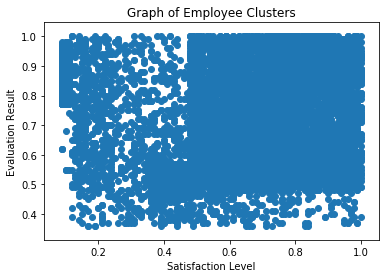

In [7]:
# Plot or Visualize the attributes
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Graph of Employee Clusters")

### K-Means Clustering (1st Algorithm)

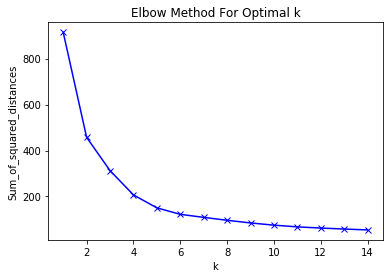

In [8]:
# 1st Step, Scree Plot to define how many clusters(K) we're going to have

Sum_of_squared_distances = []
K = range(1,15) # Range of 1 to 15
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
# From Scree plot/Elbow method above we pick K when it's on it's optimal point(min. Sum of Squared Distances and min. K)
# So we picked 5 as number of clusters.
km = KMeans(n_clusters=5)
km = km.fit(X)

Text(0.5, 1.0, 'Graph of Employee Clusters(Cluster Graph 1)')

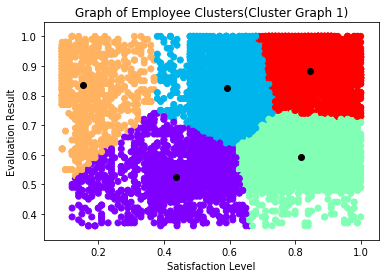

In [10]:
# re-Plot or Visualize the attributes after we've got the cluster labels by colors with centroid of the 
plt.scatter(X[:,0],X[:,1], label = 'True Position', c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Graph of Employee Clusters(Cluster Graph 1)")

### Hierarchical Clustering  (2nd Algorithm)

Text(0.5, 1.0, 'Graph of Employee Clusters')

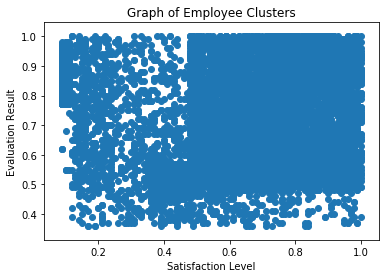

In [11]:
# Plot or Visualize the attributes
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Graph of Employee Clusters")

In [12]:
# # Dendogram of hierarchical clustering
# dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [13]:
# Fitting hierarchical clustering 
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

Text(0.5, 1.0, 'Graph of Employee Clusters(Cluster Graph 2)')

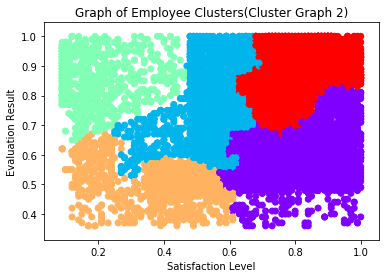

In [14]:
# re-Plot or Visualize the attributes after we've got the cluster labels by colors
plt.scatter(X[:,0],X[:,1], label = 'True Position', c=hc.labels_, cmap='rainbow')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Graph of Employee Clusters(Cluster Graph 2)")

### DBSCAN Clustering  (3rd Algorithm)

Text(0.5, 1.0, 'Graph of Employee Clusters')

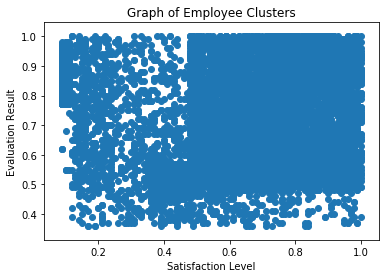

In [15]:
# Plot or Visualize the attributes
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Graph of Employee Clusters")

In [16]:
# Fitting DBSCAN clustering
dbscan = DBSCAN()
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Text(0.5, 1.0, 'Graph of Employee Clusters(Cluster Graph 3)')

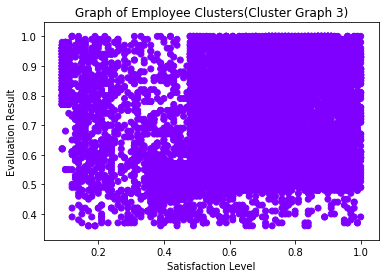

In [17]:
# re-Plot or Visualize the attributes after we've got the cluster labels by colors
plt.scatter(X[:,0],X[:,1], label = 'True Position', c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Graph of Employee Clusters(Cluster Graph 3)")

### Conclusion(Unsupervised Learning)

After running some of clustering algorithms, we can see that for 1st(Cluster Graph 1) and 2nd(Cluster Graph 2) algorithm having some similarity.

After using elbow method We decised to separated employees into 5 Clusters and after seeing others company research, we can relate our finding to theirs as follow.
- Satisfied productive employee -> Highly Engaged employee
- Netral productive employee -> Engaged
- Unsatisfied productive employee -> Becoming Disengaged
- Satisfied lazy employee -> Disengaged employee
- Unstatisfied Lazy employee -> Highly Disengaged employee 

Referenced:
https://lets-talk-more.com/employee-engagement-2/